In [0]:
import tensorflow as tf
print(tf.__version__)


2.2.0-rc3


In [0]:
from sklearn.datasets import load_breast_cancer

In [0]:
data=load_breast_cancer()

In [0]:
type(data)

sklearn.utils.Bunch

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
data.data.shape

(569, 30)

In [0]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
data.target.shape

(569,)

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
# normally we would put all of our imports at the top
# but this lets us tell a story
from sklearn.model_selection import train_test_split


# split the data into train and test sets
# this lets us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [0]:
# Now all the fun Tensorflow stuff
# Build the model

model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

# Alternatively, you can do:
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, input_shape=(D,), activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


# Train the model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)


# Evaluate the model - evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 0s 15ms/step - loss: 0.6250 - accuracy: 0.6562 - val_loss: 0.6649 - val_accuracy: 0.6223
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5667 - accuracy: 0.6982 - val_loss: 0.6031 - val_accuracy: 0.6702
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5150 - accuracy: 0.7428 - val_loss: 0.5510 - val_accuracy: 0.7234
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4720 - accuracy: 0.7874 - val_loss: 0.5068 - val_accuracy: 0.7713
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4363 - accuracy: 0.8241 - val_loss: 0.4703 - val_accuracy: 0.7766
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4075 - accuracy: 0.8373 - val_loss: 0.4386 - val_accuracy: 0.7926
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.3809 - accuracy: 0.8399 - val_loss: 0.4121 - val_accuracy: 0.8085
Epoch 8/100


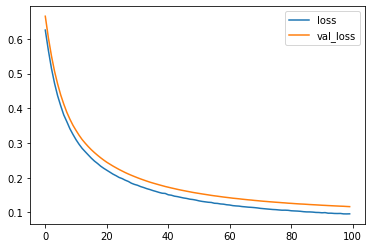

In [0]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

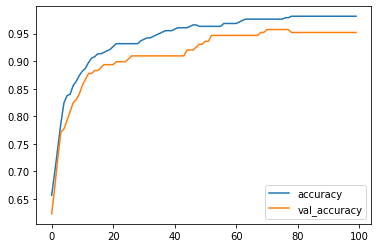

In [0]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Part-2: Making Prediction


In [0]:
P=model.predict(X_test)
print(P)

[[9.97712433e-01]
 [1.45345926e-04]
 [3.22316885e-02]
 [8.95488858e-01]
 [2.77296066e-01]
 [9.98270392e-01]
 [9.98001456e-01]
 [1.16690993e-03]
 [5.09053469e-04]
 [9.35366452e-01]
 [9.99162674e-01]
 [9.80670393e-01]
 [9.56775693e-06]
 [4.34193611e-02]
 [9.47094083e-01]
 [6.39332831e-02]
 [9.88186002e-01]
 [9.96151567e-01]
 [9.41487193e-01]
 [9.56528664e-01]
 [5.85255623e-01]
 [3.39646757e-01]
 [9.98543978e-01]
 [3.38449513e-06]
 [1.63270175e-01]
 [9.75936115e-01]
 [9.34425771e-01]
 [4.99565976e-05]
 [5.63814640e-01]
 [9.37336564e-01]
 [9.97469246e-01]
 [5.68332255e-01]
 [9.95989442e-01]
 [9.96611416e-01]
 [1.31338835e-04]
 [9.99293983e-01]
 [9.71874714e-01]
 [9.91153717e-01]
 [9.52805758e-01]
 [9.95838642e-01]
 [9.93152440e-01]
 [5.71874082e-02]
 [1.97571516e-03]
 [9.94375825e-01]
 [9.94696379e-01]
 [9.95519757e-01]
 [4.91236389e-01]
 [9.48912740e-01]
 [9.93946195e-01]
 [9.98901248e-01]
 [3.55142355e-03]
 [8.31259370e-01]
 [9.87930417e-01]
 [9.79248881e-01]
 [1.20681524e-03]
 [5.296109

In [0]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1)
import numpy as np
P = np.round(P).flatten()
print(P)

[1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1.]


In [0]:
# Calculate the accuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9521276595744681
6/6 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9521
Evaluate output: [0.11664262413978577, 0.9521276354789734]


part 3: saving and load model


In [0]:
# Let's now save our model to a file
model.save('linearclassifier.h5')

In [0]:
# Check that the model file exists
!ls -lh 

total 24K
-rw-r--r-- 1 root root  19K Apr 29 19:00 linearclassifier.h5
drwxr-xr-x 1 root root 4.0K Apr  3 16:24 sample_data


In [0]:
# Let's load the model and confirm that it still works
# Note: there is a bug in Keras where load/save only works if you DON'T use the Input() layer explicitly
# So, make sure you define the model with ONLY Dense(1, input_shape=(D,))
# At least, until the bug is fixed
# https://github.com/keras-team/keras/issues/10417
model = tf.keras.models.load_model('linearclassifier.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 1ms/step - loss: 0.1166 - accuracy: 0.9521


[0.11664262413978577, 0.9521276354789734]